<a href="https://colab.research.google.com/github/parthiv1933/BookStore-React-App/blob/master/DA6401_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: parthiv1933 (parthiv1933-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [2]:
from keras.datasets import fashion_mnist, mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import wandb
import seaborn as sn

In [ ]:
#Question-1

import numpy as np
from keras.datasets import fashion_mnist
import wandb

wandb.init(project="DA6401_Assignment_1",name="Q-1(test)")


def load_data(dataset='fashion_mnist', purpose='train'):
    dataset, purpose = dataset.lower(), purpose.lower()

    data = fashion_mnist.load_data()
    (train_data, train_labels), (test_data, test_labels) = data

    if purpose == 'train':
        return preprocess_data(train_data, train_labels)
    elif purpose == 'test':
        return preprocess_data(test_data, test_labels)

def preprocess_data(images, labels):
    images = images.reshape(images.shape[0], -1) / 255.0
    labels = np.eye(10)[labels]
    return images, labels

train_images, train_labels = load_data(purpose='train')
test_images, test_labels = load_data(purpose='test')

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

sample_images, sample_labels = [], []
unique_labels = np.unique(train_labels, axis=0)

for label in unique_labels:
    index = np.argmax(np.all(train_labels == label, axis=1))  # Find first occurrence
    sample_images.append(train_images[index])
    sample_labels.append(class_names[np.argmax(label)])

wandb.log({
    "For unique class sample images": [
        wandb.Image(img.reshape(28, 28), caption=label) for label, img in zip(sample_labels, sample_images)
    ]
})

wandb.finish()


In [3]:
def load_data(dataset='fashion_mnist', purpose='train'):
  dataset=dataset.lower()
  purpose=purpose.lower()
  x,x_t,y,y_t = None,None,None,None

  if dataset == 'fashion_mnist':
    (x, y), (x_t, y_t) = fashion_mnist.load_data()
  elif dataset == 'mnist':
    (x, y), (x_t, y_t) = mnist.load_data()

  if purpose == 'train':
    x = x.reshape(x.shape[0], 784) / 255
    y = np.eye(10)[y]
    return x, y
  elif purpose == 'test':
    x_t = x_t.reshape(x_t.shape[0], 784) / 255
    y_t = np.eye(10)[y_t]
    return x_t, y_t

In [4]:
# #Question-2

import numpy as np
import math
import random
import matplotlib.pyplot as plt

class FF_NN:
    def __init__(self, param):
        self.hidden_layers = param['hidden_lyrs']
        self.neurons = param['neurons']
        self.input_neurons = param['inpt_sz']
        self.output_neurons = param['oupt_sz']
        self.activation = param['activation']
        self.output_activation = param['oupt_activation']
        self.weight_initialisation = param['weight_initialisation']

        self.weights, self.bias = [], []
        self.initialize_weights()
        self.initialize_bias()

    def initialize_bias(self):
        self.bias = [np.random.randn(self.neurons) for _ in range(self.hidden_layers)]
        self.bias.append(np.random.randn(self.output_neurons))

    def initialize_weights(self):
        if self.weight_initialisation.lower() == 'random':
            self.weights.append(np.random.randn(self.input_neurons, self.neurons))
            self.weights.extend(np.random.randn(self.neurons, self.neurons) for _ in range(self.hidden_layers - 1))
            self.weights.append(np.random.randn(self.neurons, self.output_neurons))
        else:
            self.setup_custom_weights()

    def setup_custom_weights(self):
        limit = np.sqrt(6 / (self.input_neurons + self.neurons))
        self.weights.append(np.random.uniform(-limit, limit, (self.input_neurons, self.neurons)))
        limit = np.sqrt(6 / (self.neurons + self.neurons))
        self.weights.extend(np.random.uniform(-limit, limit, (self.neurons, self.neurons)) for _ in range(self.hidden_layers - 1))
        limit = np.sqrt(6 / (self.neurons + self.output_neurons))
        self.weights.append(np.random.uniform(-limit, limit, (self.neurons, self.output_neurons)))

    def apply_activation(self, data):
        act = self.activation.lower()
        if act == 'sigmoid':
            return 1 / (1 + np.exp(-np.clip(data, -500, 500)))
        if act == 'relu':
            return np.maximum(0, data)
        if act == 'tanh':
            return np.tanh(data)
        return data  # identity activation

    def apply_output_activation(self, data):
        if self.output_activation.lower() == 'softmax':
            exp_data = np.exp(np.clip(data, -500, 500))
            return exp_data / np.sum(exp_data, axis=1, keepdims=True)

    def feed_forward(self, input_data):
        self.A, self.H = [input_data], [input_data]

        for i in range(self.hidden_layers):
            self.A.append(self.bias[i] + np.matmul(self.H[-1], self.weights[i]))
            self.H.append(self.apply_activation(self.A[-1]))

        self.A.append(self.bias[-1] + np.matmul(self.H[-1], self.weights[-1]))
        self.H.append(self.apply_output_activation(self.A[-1]))

        return self.H[-1]



In [ ]:
# #for testting forward neural network
# PARAMETERS = {
#     'inpt_sz' : 784,
#     'oupt_sz' : 10,
#     'neurons' : 32,
#     'hidden_lyrs' : 4,
#     'activation' : 'sigmoid',
#     'oupt_activation' : 'softmax',
#     'dataset' : 'fashion_mnist',
#     'weight_initialisation': 'xavier',
# }

In [ ]:
nn = FF_NN(PARAMETERS)
x_train, y_train = load_data(PARAMETERS['dataset'], 'train')
prediction = nn.feed_forward(x_train) # shape of xtrain -> 60000,784
print(prediction[0])

[0.09378197 0.0032208  0.02158916 0.02577825 0.05529606 0.05806508
 0.56901614 0.03169456 0.06032822 0.08122977]


In [5]:
#Question 3
#backpropogation

class BP_NN:
  def __init__(self, ff_nn: FF_NN, param):
        self.ff_nn = ff_nn
        self.loss = param['loss_function']
        self.activation = param['activation']
        self.output_activation = param['oupt_activation']

  def der_actvtn(self, x):
        act = self.activation.lower()
        if act == "sigmoid":
            return x * (1 - x)
        elif act == "tanh":
            return 1 - x ** 2
        elif act == "relu":
            return (x > 0).astype(int)
        elif act == "identity":
            return np.ones_like(x)

  def der_ls(self, y, yp):
    ls = self.loss.lower()
    if ls == "mean_squared_error":
      return yp - y
    elif ls == "cross_entropy":
      return -y / yp

  def der_outpt_actvtn(self, yp):
    act = self.output_activation.lower()
    if act == "softmax":
      return np.diag(yp) - np.outer(yp, yp)


  def propogate_backward(self, y, y_pred):  # y=60000,10   y_pred=60000,10
    self.d_h, self.d_a, self.delta_weights, self.delta_bias = [], [], [], []
    der_outpt_mat = []

    self.d_h.append(self.der_ls(y, y_pred))
    for i in range(y_pred.shape[0]):
        der_outpt_mat.append(np.matmul(self.der_ls(y[i], y_pred[i]), self.der_outpt_actvtn(y_pred[i])))
    der_outpt_arr = np.array(der_outpt_mat)
    self.d_a.append(der_outpt_arr)
    # self.d_a.append(y_pred-y)

    for i in range(self.ff_nn.hidden_layers, 0, -1):
      self.delta_weights.append(np.matmul(self.ff_nn.H[i].T, self.d_a[-1]))
      self.delta_bias.append(np.sum(self.d_a[-1], axis=0))
      self.d_h.append(np.matmul(self.d_a[-1], self.ff_nn.weights[i].T))
      self.d_a.append(self.d_h[-1] * self.der_actvtn(self.ff_nn.H[i]))

    self.delta_weights.append(np.matmul(self.ff_nn.H[0].T, self.d_a[-1]))
    self.delta_weights.reverse()
    self.delta_bias.append(np.sum(self.d_a[-1], axis=0))
    self.delta_bias.reverse()

    for i in range(len(self.delta_bias)):
      self.delta_weights[i] /= y.shape[0]
      self.delta_bias[i] /= y.shape[0]

    return self.delta_weights, self.delta_bias

In [6]:
#Q3 part-B
#optimizers

class Optimizer():
  def __init__(
      self,
      ff_nn: FF_NN,
      bp_nn: BP_NN,
      param
  ):
    self.ff_nn, self.bp_nn, self.lr, self.optimizer, self.momentum, self.decay = ff_nn, bp_nn, param['learning_rate'], param['optimizer'], param['momentum'], param['decay']
    self.B1, self.B2, self.eps, self.t = param['beta1'], param['beta2'], param['epsilon'], 0
    self.b_history = [np.zeros_like(i) for i in self.ff_nn.bias]
    self.b_hm = [np.zeros_like(i) for i in self.ff_nn.bias]
    self.w_history = [np.zeros_like(i) for i in self.ff_nn.weights]
    self.w_hm = [np.zeros_like(i) for i in self.ff_nn.weights]


  def optimize(self, delta_weights, delta_bias):
    opt = self.optimizer.lower()
    if(opt == "sgd"):
      self.SGD(delta_weights, delta_bias)
    elif(opt == "momentum"):
      self.MGD(delta_weights, delta_bias)
    elif(opt == "nesterov"):
      self.NAG(delta_weights, delta_bias)
    elif(opt == "rmsprop"):
      self.RMSPROP(delta_weights, delta_bias)
    elif(opt == "adam"):
      self.ADAM(delta_weights, delta_bias)
    elif(opt == "nadam"):
      self.NADAM(delta_weights, delta_bias)



  def SGD(self, delta_weights, delta_bias):
    for i in range(self.ff_nn.hidden_layers + 1):
      self.ff_nn.weights[i] -= self.lr * (delta_weights[i] + self.ff_nn.weights[i]*self.decay)
      self.ff_nn.bias[i] -= self.lr * (delta_bias[i] + self.ff_nn.bias[i]*self.decay)

  def MGD(self, delta_weights, delta_bias):
    for i in range(self.ff_nn.hidden_layers + 1):
      self.w_history[i] = self.momentum * self.w_history[i] + delta_weights[i]
      self.ff_nn.weights[i] -= self.lr * (self.w_history[i] + self.ff_nn.weights[i]*self.decay)
      self.b_history[i] = self.momentum * self.b_history[i] + delta_bias[i]
      self.ff_nn.bias[i] -= self.lr * (self.b_history[i] + self.ff_nn.bias[i]*self.decay)

  def NAG(self, delta_weights, delta_bias):
    for i in range(self.ff_nn.hidden_layers + 1):
      self.w_history[i] = self.momentum * self.w_history[i] + delta_weights[i]
      self.ff_nn.weights[i] -= self.lr * (self.momentum * self.w_history[i] + delta_weights[i] + self.ff_nn.weights[i]*self.decay)
      self.b_history[i] = self.momentum * self.b_history[i] + delta_bias[i]
      self.ff_nn.bias[i] -= self.lr * (self.momentum * self.b_history[i] + delta_bias[i] + self.ff_nn.bias[i]*self.decay)


  def RMSPROP(self, delta_weights, delta_bias):
    for i in range(self.ff_nn.hidden_layers + 1):
      self.w_history[i] = self.w_history[i]*self.momentum + (1-self.momentum)*delta_weights[i]**2
      self.ff_nn.weights[i] -= delta_weights[i]*(self.lr / (np.sqrt(self.w_history[i]) + self.eps)) + self.decay * self.ff_nn.weights[i] * self.lr
      self.b_history[i] = self.b_history[i]*self.momentum + (1-self.momentum)*delta_bias[i]**2
      self.ff_nn.bias[i] -= delta_bias[i]*(self.lr / (np.sqrt(self.b_history[i]) + self.eps)) + self.decay * self.ff_nn.bias[i] * self.lr

  def ADAM(self, delta_weights, delta_bias):
    for i in range(self.ff_nn.hidden_layers + 1):
      self.w_hm[i] = self.B1 * self.w_hm[i] + (1 - self.B1) * delta_weights[i]
      self.w_history[i] = self.B2 * self.w_history[i] + (1 - self.B2) * delta_weights[i]**2
      self.w_hat_hm = self.w_hm[i] / (1 - self.B1**(self.t + 1))
      self.w_history_hat = self.w_history[i] / (1 - self.B2**(self.t + 1))
      self.ff_nn.weights[i] -= self.lr * (self.w_hat_hm / ((np.sqrt(self.w_history_hat)) + self.eps) + self.decay * self.ff_nn.weights[i])

      self.b_hm[i] = self.B1 * self.b_hm[i] + (1 - self.B1) * delta_bias[i]
      self.b_history[i] = self.B2 * self.b_history[i] + (1 - self.B2) * delta_bias[i]**2
      self.b_hat_hm = self.b_hm[i] / (1 - self.B1**(1+self.t))
      self.h_hat_b = self.b_history[i] / (1 - self.B2**(1+self.t))
      self.ff_nn.bias[i] -= self.lr * (self.b_hat_hm / ((np.sqrt(self.h_hat_b)) + self.eps) + self.decay * self.ff_nn.bias[i])


  def NADAM(self, delta_weights, delta_bias):
    for i in range(self.ff_nn.hidden_layers + 1):
      self.w_hm[i] = self.B1 * self.w_hm[i] + (1 - self.B1) * delta_weights[i]
      self.w_hat_hm = self.w_hm[i] / (1 - self.B1 ** (self.t + 1))
      self.w_history[i] = self.B2 * self.w_history[i] + (1 - self.B2) * delta_weights[i]**2
      self.w_history_hat = self.w_history[i] / (1 - self.B2 ** (self.t + 1))
      w_temp = self.B1 * self.w_hat_hm + ((1 - self.B1) / (1 - self.B1 ** (self.t + 1))) * delta_weights[i]
      self.ff_nn.weights[i] -= self.lr * (w_temp / ((np.sqrt(self.w_history_hat)) + self.eps) + self.decay * self.ff_nn.weights[i])


      self.b_hm[i] = self.B1 * self.b_hm[i] + (1 - self.B1) * delta_bias[i]
      self.b_hat_hm = self.b_hm[i] / (1 - self.B1 ** (self.t + 1))
      self.b_history[i] = self.B2 * self.b_history[i] + (1 - self.B2) * delta_bias[i]**2
      self.h_hat_b = self.b_history[i] / (1 - self.B2 ** (self.t + 1))
      b_temp = self.B1 * self.b_hat_hm + ((1 - self.B1) / (1 - self.B1 ** (self.t + 1))) * delta_bias[i]
      self.ff_nn.bias[i] -= self.lr * (b_temp / ((np.sqrt(self.h_hat_b)) + self.eps) + self.decay * self.ff_nn.bias[i])



In [7]:
#loss function
def calculate_loss(y, y_pred, loss_function):
  ls_fn = loss_function.lower()
  if ls_fn == "mean_squared_error":
    return np.sum((y_pred-y) ** 2) / y.shape[0]
  elif ls_fn == "cross_entropy":
    return (-np.sum(y * np.log(y_pred))) / y.shape[0]

In [24]:
# def train():
#   wandb.init()
#   PARAMETERS = wandb.config
#   wandb.run.name = f'Hidden_{PARAMETERS.hidden_lyrs}_Batch_{PARAMETERS.batch_sz}_ACT_{PARAMETERS.activation}'

#   x_train, y_train = load_data(PARAMETERS['dataset'], 'train')
#   np.random.seed(7)
#   ff_nn = FF_NN(PARAMETERS)
#   bp_nn = BP_NN(ff_nn, PARAMETERS)
#   opt = Optimizer(ff_nn, bp_nn, PARAMETERS)
#   print("Initial Accuracy: {}".format(np.sum(np.argmax(ff_nn.feed_forward(x_train), axis=1) == np.argmax(y_train, axis=1)) / y_train.shape[0]))
#   batch_size = PARAMETERS['batch_sz']

#   x_train, x_train_t, y_train, y_train_t = train_test_split(x_train, y_train, test_size=0.1, random_state=7)

#   for epoch in range(PARAMETERS['epochs']):
#     for i in range(0, x_train.shape[0], batch_size):
#       y_batch = y_train[i:i+batch_size]
#       x_batch = x_train[i:i+batch_size]
#       opt.optimize(*bp_nn.propogate_backward(y_batch, ff_nn.feed_forward(x_batch)))

#     opt.t += 1
#     y_pred = ff_nn.feed_forward(x_train)
#     y_pred_t = ff_nn.feed_forward(x_train_t)
#     print("epoch- ",epoch+1)
#     print("accuracy- ",np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_train, axis=1)) / y_train.shape[0])
#     print("loss- ", calculate_loss(y_train, y_pred, PARAMETERS['loss_function']))
#     print("validation- ",np.sum(np.argmax(y_pred_t, axis=1) == np.argmax(y_train_t, axis=1)) / y_train_t.shape[0])


#     lg={
#         'accuracy':np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_train, axis=1)) / y_train.shape[0],
#         'val_accuracy':np.sum(np.argmax(y_pred_t, axis=1) == np.argmax(y_train_t, axis=1)) / y_train_t.shape[0],
#         'epoch':epoch+1,
#         'loss':calculate_loss(y_train, y_pred, PARAMETERS['loss_function']),
#         'validation_loss':calculate_loss(y_train_t, y_pred_t, PARAMETERS['loss_function'])
#     }
#     wandb.log(lg)


#   return ff_nn



In [29]:
# sweep_config = {
#     "method": "bayes",
#     "name": "Q4 WandB sweep",
#     "metric": {"goal": "minimize", "name": "validation_loss"},
#     "parameters": {
#         "inpt_sz": {"values": [784]},
#         "oupt_sz": {"values": [10]},
#         "oupt_activation": {"values": ["softmax"]},
#         "dataset": {"values": ["fashion_mnist"]},
#         "loss_function": {"values": ["cross_entropy"]},
#         "beta": {"values": [0.9]},
#         "beta1": {"values": [0.9]},
#         "beta2": {"values": [0.999]},
#         "neurons": {"values": [32, 64, 128]},
#         "hidden_lyrs": {"values": [3, 4, 5]},
#         "activation": {"values": ["relu", "tanh", "sigmoid"]},
#         "learning_rate": {"values": [1e-3, 1e-4]},
#         "optimizer": {"values": ['adam', 'sgd', 'nesterov', 'rmsprop', 'momentum', 'nadam']},
#         "momentum": {"values": [0.8, 0.9]},
#         "batch_sz": {"values": [16, 32, 64]},
#         "epochs": {"values": [5, 10]},
#         "weight_initialisation": {"values": ["random", "xavier"]},
#         "decay": {"values": [0, 0.0005, 0.5]},
#         "epsilon": {"values": [1e-8, 1e-10]},
#     }
# }


In [27]:
# sweep_id = wandb.sweep(sweep_config, project="DA6401_Assignment_1")

Create sweep with ID: hnycr6fi
Sweep URL: https://wandb.ai/parthiv1933-indian-institute-of-technology-madras/DA6401_Assignment_1/sweeps/hnycr6fi


In [31]:
#  wandb.agent(sweep_id, function=train, count=190)
# wandb.finish()

In [8]:
#Question-7
def train(PARAMETERS):
  # wandb.init()
  # PARAMETERS = wandb.config
  # wandb.run.name = f'hl_{PARAMETERS.hidden_lyrs}_bs_{PARAMETERS.batch_sz}_ac_{PARAMETERS.activation}'

  x_train, y_train = load_data(PARAMETERS['dataset'], 'train')
  np.random.seed(7)
  ff_nn = FF_NN(PARAMETERS)
  bp_nn = BP_NN(ff_nn, PARAMETERS)
  opt = Optimizer(ff_nn, bp_nn, PARAMETERS)
  print("Initial Accuracy: {}".format(np.sum(np.argmax(ff_nn.feed_forward(x_train), axis=1) == np.argmax(y_train, axis=1)) / y_train.shape[0]))
  batch_size = PARAMETERS['batch_sz']

  x_train, x_train_t, y_train, y_train_t = train_test_split(x_train, y_train, test_size=0.1, random_state=7)

  for epoch in range(PARAMETERS['epochs']):
    for i in range(0, x_train.shape[0], batch_size):
      y_batch = y_train[i:i+batch_size]
      x_batch = x_train[i:i+batch_size]
      opt.optimize(*bp_nn.propogate_backward(y_batch, ff_nn.feed_forward(x_batch)))

    opt.t += 1
    y_pred = ff_nn.feed_forward(x_train)
    y_pred_t = ff_nn.feed_forward(x_train_t)
    print("epoch-",epoch+1)
    print("accuracy-",np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_train, axis=1)) / y_train.shape[0])
    print("loss-", calculate_loss(y_train, y_pred, PARAMETERS['loss_function']))
    print("validation-",np.sum(np.argmax(y_pred_t, axis=1) == np.argmax(y_train_t, axis=1)) / y_train_t.shape[0])


    # lg={
    #     'accuracy':np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_train, axis=1)) / y_train.shape[0],
    #     'val_accuracy':np.sum(np.argmax(y_pred_t, axis=1) == np.argmax(y_train_t, axis=1)) / y_train_t.shape[0],
    #     'epoch':epoch+1,
    #     'loss':calculate_loss(y_train, y_pred, PARAMETERS['loss_function']),
    #     'validation_loss':calculate_loss(y_train_t, y_pred_t, PARAMETERS['loss_function'])
    # }
    # wandb.log(lg)


  return ff_nn



In [9]:
#Question-7

# For Best Validation Accuracy
PARAMETERS = {
    'inpt_sz' : 784,
    'oupt_sz' : 10,
    'neurons' : 128,
    'hidden_lyrs' : 4,
    'activation' : 'tanh',
    'oupt_activation' : 'softmax',
    'dataset' : 'fashion_mnist',
    'loss_function': 'cross_entropy',
    'learning_rate': 0.001,
    'optimizer': 'nadam',
    'momentum': 0.9,
    'batch_sz': 16,
    'epochs': 10,
    'weight_initialisation': 'xavier',
    'decay': 0.0005,
    'beta': 0.9,
    'beta1': 0.9,
    'beta2': 0.999,
    'epsilon': 1e-10
}

In [10]:
model = train(PARAMETERS)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Initial Accuracy: 0.12478333333333333
epoch- 1
accuracy- 0.8667037037037038
loss- 0.3630093596848399
validation- 0.859
epoch- 2
accuracy- 0.8811111111111111
loss- 0.3213985467970788
validation- 0.8653333333333333
epoch- 3
accuracy- 0.8895555555555555
loss- 0.29702553102236806
validation- 0.8725
epoch- 4
accuracy- 0.8971481481481481
loss- 0.27871996384340775
validation- 0.8778333333333334
epoch- 5
accuracy- 0.9026111111111111
loss- 0.26433914710438244
validation- 0.8805
epoch- 6
accuracy- 0.9067222222222222
loss- 0.25261888114780623
validation- 0.8833333333333333
epoch- 7
accuracy- 0.9105555555555556
loss- 0.24281085577057415
validation- 0.885
epoch- 8
accuracy- 0.9133703703703704
loss- 0.234264060460113
validation- 0.8858333333333334
epoch- 9
accuracy- 0.9158888888888889
loss- 0.22653538231086298
vali

In [24]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
def plot_confusion_mat(y, y_pred):
  import pandas as pd
  import seaborn as sn
  mp = np.zeros((len(classes),len(classes)))
  for i,j in zip(y, y_pred):
    mp[np.argmax(i)][np.argmax(j)]+=1

  df_cm = pd.DataFrame(mp, [i for i in classes], [i for i in classes])
  plt.figure(figsize=(12,12))
  sn.set(font_scale=1) # for label size
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 7}, cmap='inferno', fmt='g')
  plt.xlabel('Prediction')
  plt.ylabel('Actual')

  wandb.init(project="DA6401_Assignment_1")
  wandb.run.name = f'Q-7 Confusion Matrix'
  wandb.log({"plot":wandb.Image(plt)})
  wandb.finish()


Test Accuracy- 0.8812


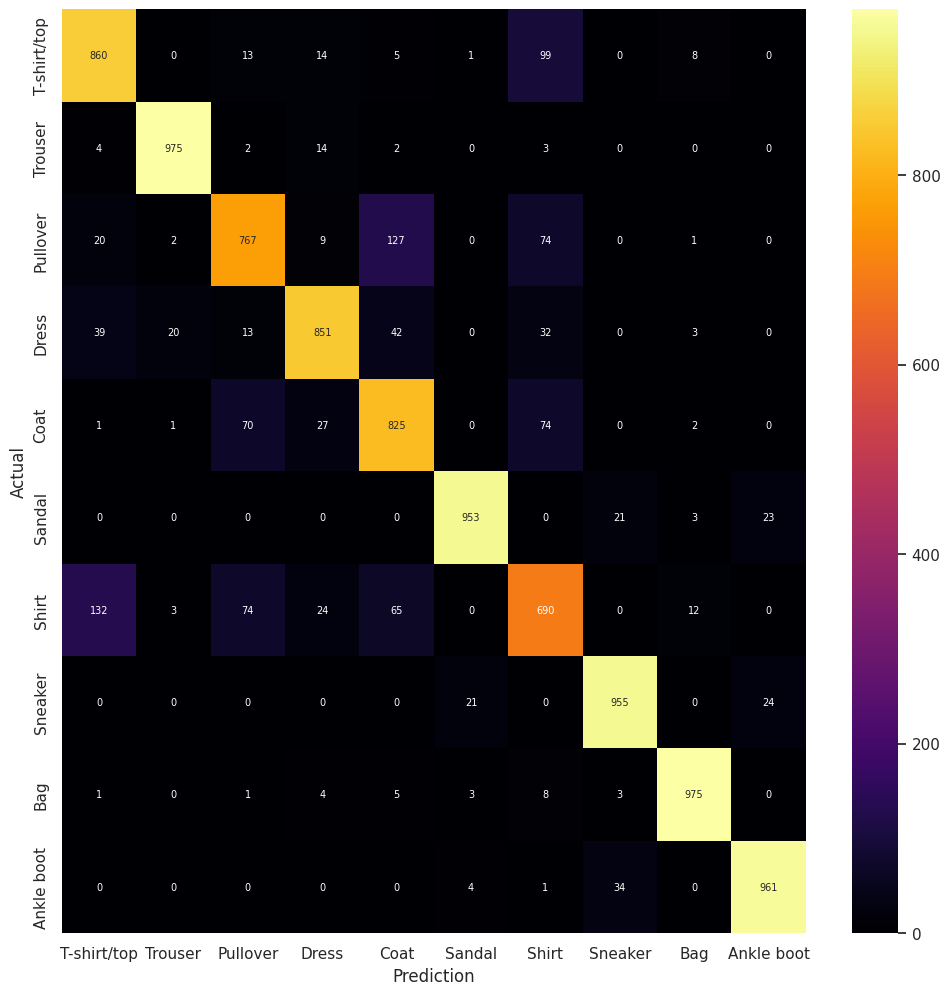

In [27]:
x_test, y_test = load_data(PARAMETERS['dataset'], 'test')
prediction = model.feed_forward(x_test)
print("Test Accuracy-",np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / y_test.shape[0])

plot_confusion_mat(y_test, prediction)